In [1]:
#importing libraries for exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>Data Preparation</h2>

In [2]:
#reading the data
movie_ratings_by_user = pd.read_csv('./dataset/data.csv',sep=r'\s*,\s*',engine='python',
                                    usecols=['user id','movie_id','rating','timestamp'],
                                    dtype={'user id':np.int32,'movie_id':np.int32,'rating':np.float32,'timestamp':np.int32})
movie_ratings_by_user.head()

,user id,movie_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [3]:
#converting timestamp from unix seconds to datetime
movie_ratings_by_user['timestamp'] = pd.to_datetime(movie_ratings_by_user['timestamp'], unit='s')
movie_ratings_by_user.head()

,user id,movie_id,rating,timestamp
0,196,242,3.0,1997-12-04 15:55:49
1,186,302,3.0,1998-04-04 19:22:22
2,22,377,1.0,1997-11-07 07:18:36
3,244,51,2.0,1997-11-27 05:02:03
4,166,346,1.0,1998-02-02 05:33:16


In [4]:
# item.csv contains the movie id and the movie title
movie_titles=pd.read_csv("./dataset/item.csv",sep=r'\s*,\s*',encoding='latin-1',index_col = False,usecols=['movie_id','movie title'],dtype={'movie_id': 'int32', 'movie title': 'str'},engine='python')
movie_titles.head()

,movie_id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
#merging the movie titles with the movie ratings by user
movie_ratings_by_user = pd.merge(movie_ratings_by_user,movie_titles,on='movie_id')
movie_ratings_by_user.head()

,user id,movie_id,rating,timestamp,movie title
0,196,242,3.0,1997-12-04 15:55:49,Kolya (1996)
1,63,242,3.0,1997-10-01 23:06:30,Kolya (1996)
2,226,242,5.0,1998-01-04 04:37:51,Kolya (1996)
3,154,242,3.0,1997-11-10 05:03:55,Kolya (1996)
4,306,242,5.0,1997-10-10 17:16:33,Kolya (1996)


In [6]:
#changing the column names, 'user id' to 'user_id' and 'movie title' to 'movie_title'
movie_ratings_by_user.columns = ['user_id', 'movie_id', 'rating', 'timestamp', 'movie_title']
movie_ratings_by_user.head()

,user_id,movie_id,rating,timestamp,movie_title
0,196,242,3.0,1997-12-04 15:55:49,Kolya (1996)
1,63,242,3.0,1997-10-01 23:06:30,Kolya (1996)
2,226,242,5.0,1998-01-04 04:37:51,Kolya (1996)
3,154,242,3.0,1997-11-10 05:03:55,Kolya (1996)
4,306,242,5.0,1997-10-10 17:16:33,Kolya (1996)


In [7]:
#pivot table to get the movie ratings by user
movie_ratings_by_user_pivot = movie_ratings_by_user.pivot_table(index='user_id',columns='movie_title',values='rating').fillna(0)

In [8]:
movie_ratings_by_user_pivot.describe()

movie_title,"""20","""39 Steps","""Abyss","""Addiction","""Adventures of Pinocchio","""Adventures of Priscilla","""Adventures of Robin Hood","""Affair to Remember","""African Queen","""Age of Innocence",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,0.267232,0.253446,0.574761,0.025451,0.126193,0.423118,0.269353,0.115589,0.674443,0.233298,...,0.164369,0.001060,0.024390,0.003181,0.836691,0.343584,0.129374,0.013786,0.032874,0.003181
std,0.951396,1.004458,1.366285,0.271408,0.649993,1.211316,0.999784,0.702139,1.569019,0.897436,...,0.729657,0.032565,0.319964,0.097694,1.666085,1.033758,0.623506,0.186659,0.350890,0.097694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,1.000000,5.000000,3.000000,5.000000,5.000000,5.000000,3.000000,5.000000,3.000000


In [9]:
#count the number of times a movie has been rated by users
#column name is the movie title and the value is the rating given by the user(row) to the movie
# and add it as a column to the movie_ratings_by_user_pivot dataframe
combine_movie_rating = movie_ratings_by_user.dropna(axis = 0, subset = ['movie_title'])
movie_ratings_total_count = (combine_movie_rating.groupby(by = ['movie_title'])['rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['movie_title', 'totalRatingCount']])
movie_ratings_total_count.head()

,movie_title,totalRatingCount
0,"""20",72
1,"""39 Steps",59
2,"""Abyss",151
3,"""Addiction",11
4,"""Adventures of Pinocchio",39


In [10]:
movie_ratings_by_user_with_total_rating_count = combine_movie_rating.merge(movie_ratings_total_count, left_on = 'movie_title', right_on = 'movie_title', how = 'left')
movie_ratings_by_user_with_total_rating_count.head()

,user_id,movie_id,rating,timestamp,movie_title,totalRatingCount
0,196,242,3.0,1997-12-04 15:55:49,Kolya (1996),117
1,63,242,3.0,1997-10-01 23:06:30,Kolya (1996),117
2,226,242,5.0,1998-01-04 04:37:51,Kolya (1996),117
3,154,242,3.0,1997-11-10 05:03:55,Kolya (1996),117
4,306,242,5.0,1997-10-10 17:16:33,Kolya (1996),117


In [17]:
movie_ratings_by_user_with_total_rating_count[movie_ratings_by_user_with_total_rating_count['movie_id']==1]['rating'].mean()

3.8783185482025146

<h2> Exploratory Data Analysis </h2>

<p>Here we will perform some preliminary analysis on the data. We will look at the distribution of the data, the correlation between the features, and the distribution of the target variable.</p>

In [20]:
#Average ratings for each movie
avg_ratings = pd.DataFrame(movie_ratings_by_user_with_total_rating_count.groupby('movie_id')['rating'].mean())
avg_ratings['rating_counts'] = pd.DataFrame(movie_ratings_by_user_with_total_rating_count.groupby('movie_id')['rating'].count())
avg_ratings.head()


,rating,rating_counts
movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302325,86


<AxesSubplot:>

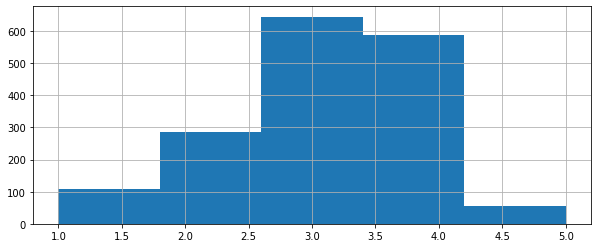

In [38]:
#average rating distribution
plt.figure(figsize=(10,4))
avg_ratings['rating'].hist(bins=5)

<AxesSubplot:>

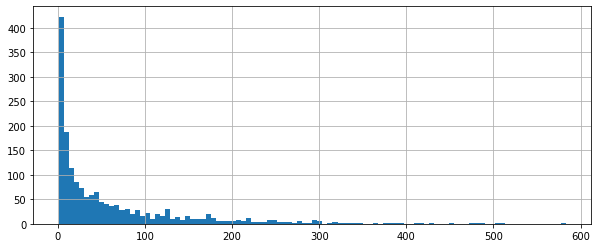

In [31]:
#total rating count distribution
plt.figure(figsize=(10,4))
avg_ratings['rating_counts'].hist(bins=100)

<Figure size 720x288 with 0 Axes>

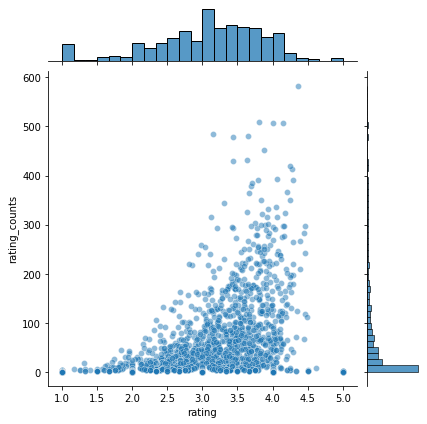

In [32]:
#average rating vs total rating count
plt.figure(figsize=(10,4))
sns.jointplot(x='rating',y='rating_counts',data=avg_ratings,alpha=0.5)


In [33]:
#removing the movies with less than 50 ratings
popularity_threshold = 50
rating_popular_movie= movie_ratings_by_user_with_total_rating_count.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()


,user_id,movie_id,rating,timestamp,movie_title,totalRatingCount
0,196,242,3.0,1997-12-04 15:55:49,Kolya (1996),117
1,63,242,3.0,1997-10-01 23:06:30,Kolya (1996),117
2,226,242,5.0,1998-01-04 04:37:51,Kolya (1996),117
3,154,242,3.0,1997-11-10 05:03:55,Kolya (1996),117
4,306,242,5.0,1997-10-10 17:16:33,Kolya (1996),117


In [35]:
#average rating of the popular movies
avg_ratings_popular = pd.DataFrame(rating_popular_movie.groupby('movie_id')['rating'].mean())
avg_ratings_popular['rating_counts'] = pd.DataFrame(rating_popular_movie.groupby('movie_id')['rating'].count())
avg_ratings_popular.head()

,rating,rating_counts
movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302325,86


<AxesSubplot:>

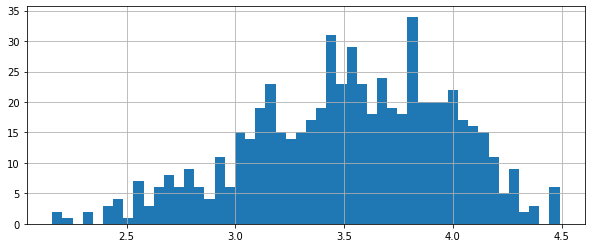

In [40]:
#average rating distribution of the popular movies
plt.figure(figsize=(10,4))
avg_ratings_popular['rating'].hist(bins=50)


<Figure size 720x288 with 0 Axes>

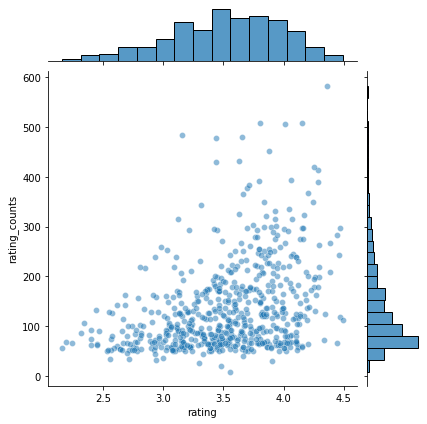

In [37]:
#movie rating vs total rating count of the popular movies
plt.figure(figsize=(10,4))
sns.jointplot(x='rating',y='rating_counts',data=avg_ratings_popular,alpha=0.5)


In [42]:
#correlation between rating_count and rating
avg_ratings_popular.corr()

,rating,rating_counts
rating,1.000000,0.352609
rating_counts,0.352609,1.000000
